In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [2]:
sample_1000_image = np.load(r"F:/Fall 2019/stat 479-ML/Project_Group_7/GITHUB/sample_1000_image.npy",allow_pickle=True)
sample_1000_label = np.load(r"F:/Fall 2019/stat 479-ML/Project_Group_7/GITHUB/sample_1000_label.npy",allow_pickle=True)

label_map = open(r"F:/Fall 2019/stat 479-ML/Project_Group_7/GITHUB/stat-479-project/DataPrep/label_map.txt")
label_map = ast.literal_eval(label_map.read())

sample_1000_label = list(sample_1000_label.flatten())
sample_1000_label = list(label_map.get(k, "") for k in sample_1000_label )

In [3]:
X=sample_1000_image/255
pca = PCA(n_components=256)

X_pca = pca.fit_transform(X)
print(X_pca.shape)

(345000, 256)


In [4]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(np.argmax(var))

251


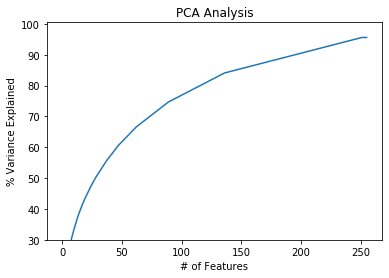

In [5]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [6]:
# meanVals = np.mean(X, axis=0)
# DataAdjust = X-meanVals      
# cov_mat = np.cov(DataAdjust.astype(float).T)

# eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print('\nEigenvalues \n%s' %eig_vals)

In [7]:
# plt.scatter(X,X,c='white',marker='o',edgecolor='black',s=50)
# plt.grid()
# plt.show()

#### K means

In [8]:
from sklearn.cluster import MiniBatchKMeans
import time
import pandas as pd
from collections import Counter

In [9]:
prediction =[]
distortions = []
t0 = time.time()

for i in range(1, 345, 50):
    print(i)
    km = MiniBatchKMeans(init='k-means++', n_clusters=i, batch_size=10000, n_init=10, max_iter=300)
    prediction.append(km.fit_predict(X_pca))
    distortions.append(km.inertia_)

    
km = MiniBatchKMeans(init='k-means++', n_clusters=345, batch_size=10000, n_init=10, max_iter=300)
prediction.append(km.fit_predict(X_pca))
distortions.append(km.inertia_)
    
t_mini_batch = time.time() - t0

1
51
101
151
201
251
301


319.715576171875


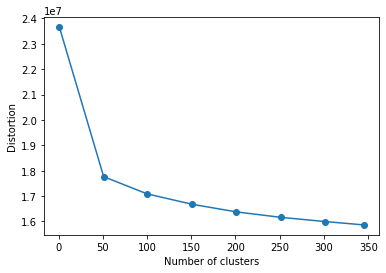

In [28]:
print(t_mini_batch)

plt.plot((1,51,100,151,201,251,301,345),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [11]:
y_kmeans=list(prediction[5])
y_category = np.array(sample_1000_label)
clusters=set(y_kmeans)
print(clusters)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [12]:
cluster_index = []
for cluster in clusters:
    indices = [i for i, x in enumerate(y_kmeans) if x == cluster]
    cluster_index.append(indices)

In [13]:
category_cluster=[]
for index in cluster_index:
    category_cluster.append(y_category[index]) 

In [14]:
for new_category in category_cluster:
#     print(new_category)
    c = Counter(new_category)
    print(c.most_common(4))

[('zebra', 105), ('scorpion', 56), ('cow', 43), ('horse', 40)]
[('palmtree', 145), ('stopsign', 132), ('lollipop', 117), ('flower', 115)]
[('bowtie', 435), ('dumbbell', 229), ('fish', 74), ('eyeglasses', 72)]
[('star', 134), ('snowflake', 109), ('TheEiffelTower', 89), ('ceilingfan', 79)]
[('candle', 198), ('pencil', 134), ('knife', 127), ('crayon', 106)]
[('donut', 54), ('smileyface', 52), ('blueberry', 48), ('cloud', 47)]
[('flyingsaucer', 109), ('submarine', 79), ('cruiseship', 75), ('hat', 70)]
[('television', 132), ('birthdaycake', 89), ('sink', 76), ('purse', 73)]
[('rollercoaster', 53), ('zigzag', 51), ('eyeglasses', 40), ('dolphin', 38)]
[('dumbbell', 271), ('key', 49), ('drums', 45), ('bicycle', 44)]
[('table', 96), ('swingset', 65), ('cannon', 58), ('dolphin', 42)]
[('seaturtle', 63), ('airplane', 61), ('spider', 56), ('rhinoceros', 47)]
[('rainbow', 453), ('swingset', 172), ('boomerang', 159), ('bridge', 121)]
[('garden', 52), ('mermaid', 37), ('mosquito', 33), ('rollercoaste